In [18]:
import pandas as pd
import numpy as np
import time
from datetime import date
import datetime as dt
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Data exploration

In [2]:
df = pd.read_excel('President Donald Trump Private Schedules, Nov. 7, 2018 to Feb. 2, 2019.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 11 columns):
week                      577 non-null int64
date                      577 non-null datetime64[ns]
time_start                577 non-null object
time_end                  577 non-null object
duration                  565 non-null object
listed_title              565 non-null object
top_category              577 non-null object
listed_location           502 non-null object
listed_project_officer    208 non-null object
detail_category           561 non-null object
notes                     17 non-null object
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 49.7+ KB


In [4]:
df.head()

,week,date,time_start,time_end,duration,listed_title,top_category,listed_location,listed_project_officer,detail_category,notes
0,1,2018-11-07,08:00:00,11:00:00,03:00:00,Executive time,executive_time,Oval office,NaN,executive_time,NaN
1,1,2018-11-07,11:00:00,11:30:00,00:30:00,Meeting with the chief of staff,meeting,Oval office,NaN,cos_meeting,NaN
2,1,2018-11-07,11:30:00,12:30:00,01:00:00,Executive time,executive_time,Oval office,NaN,executive_time,NaN
3,1,2018-11-07,12:30:00,13:30:00,01:00:00,Lunch,lunch,Private dining room,NaN,solo_lunch,NaN
4,1,2018-11-07,13:30:00,17:00:00,03:30:00,Executive time,executive_time,Oval office,NaN,executive_time,NaN


In [5]:
print(type(df.time_start.loc[0]),type(df.time_end.loc[0]))

<class 'datetime.time'> <class 'datetime.time'>


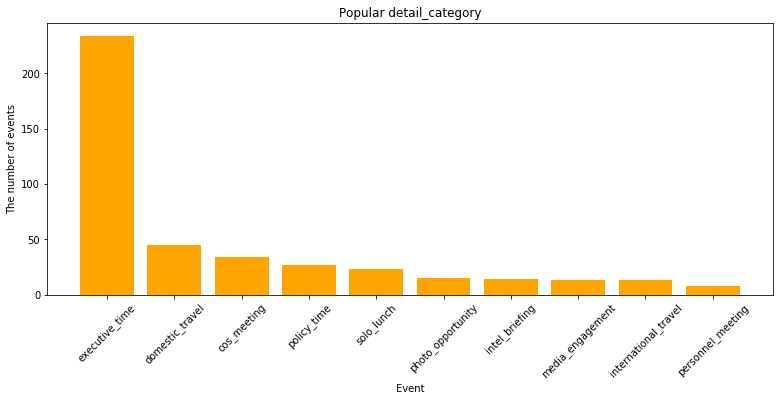

In [6]:
popular_detail_category = df.detail_category.value_counts().head(10)
plt.figure(figsize = (13,5))
height  = popular_detail_category
bars = popular_detail_category.index
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = '#ffa500')
plt.xticks(y_pos, bars)
plt.title('Popular detail_category')
plt.ylabel('The number of events')
plt.xlabel('Event')
plt.xticks(rotation =  45)
plt.show()

#### Cleaning NaN

In [7]:
df.isnull().sum()

week                        0
date                        0
time_start                  0
time_end                    0
duration                   12
listed_title               12
top_category                0
listed_location            75
listed_project_officer    369
detail_category            16
notes                     560
dtype: int64

In [8]:
df = df.drop(columns  = ['listed_project_officer','notes','detail_category','listed_location'])

In [9]:
df = df.dropna().reset_index(drop = True)

In [10]:
df.isnull().sum()

week            0
date            0
time_start      0
time_end        0
duration        0
listed_title    0
top_category    0
dtype: int64

In [11]:
df.date.unique().shape[0]

51

### Data analysis 

In [12]:
df.head()

,week,date,time_start,time_end,duration,listed_title,top_category
0,1,2018-11-07,08:00:00,11:00:00,03:00:00,Executive time,executive_time
1,1,2018-11-07,11:00:00,11:30:00,00:30:00,Meeting with the chief of staff,meeting
2,1,2018-11-07,11:30:00,12:30:00,01:00:00,Executive time,executive_time
3,1,2018-11-07,12:30:00,13:30:00,01:00:00,Lunch,lunch
4,1,2018-11-07,13:30:00,17:00:00,03:30:00,Executive time,executive_time


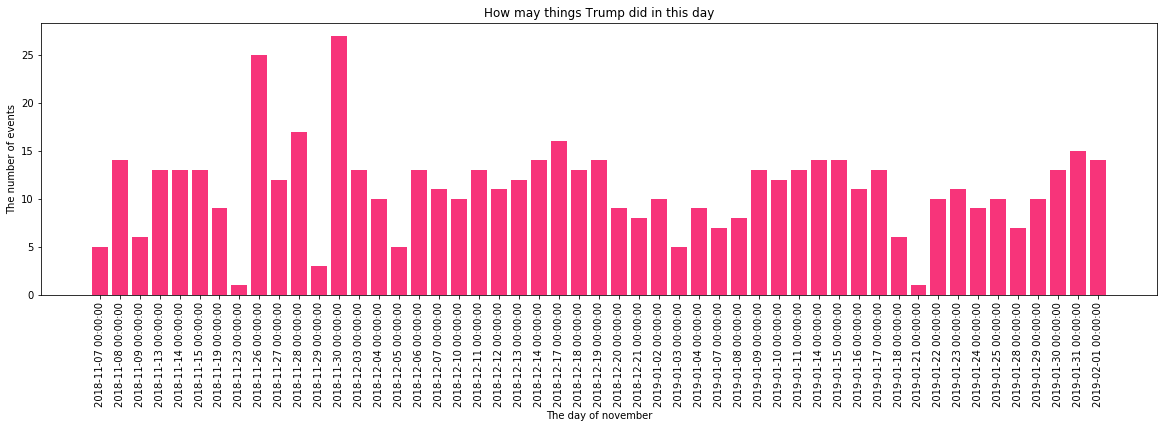

In [14]:
busy_day =  df.groupby(['date']).top_category.count()
plt.figure(figsize = (20,5))
height  = busy_day
bars = busy_day.index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = '#F7347A')
plt.xticks(y_pos, bars)
plt.title('How may things Trump did in this day')
plt.ylabel('The number of events')
plt.xlabel('The day of november')
plt.xticks(rotation =  90)
plt.show()

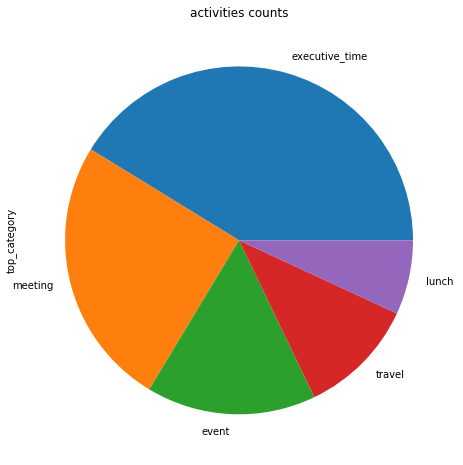

executive_time    233
meeting           142
event              89
travel             62
lunch              39
Name: top_category, dtype: int64


In [17]:
popular_top_category = df.top_category.value_counts()
popular_top_category.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('activities counts')
plt.show()
print(popular_top_category)

#### Data preprocessing 

In [19]:
def time_in_range(df,x):
    """Return true if x is in the range [start, end]"""
    start = df.time_start
    end = df.time_end
    if (start <= x <= end):
        return 1
    else:
        return 0

In [23]:
goal_time = [datetime.time(9,1),datetime.time(11, 1),datetime.time(13, 1),datetime.time(15, 1)]

df['top_category_0901'] = df.apply(lambda x: time_in_range(x, goal_time[0]), axis=1)
df['top_category_1101'] = df.apply(lambda x: time_in_range(x, goal_time[1]), axis=1)
df['top_category_1301'] = df.apply(lambda x: time_in_range(x, goal_time[2]), axis=1)
df['top_category_1501'] = df.apply(lambda x: time_in_range(x, goal_time[3]), axis=1)

In [24]:
df.head(3)

,week,date,time_start,time_end,duration,listed_title,top_category,top_category_0901,top_category_1101,top_category_1301,top_category_1501
0,1,2018-11-07,08:00:00,11:00:00,03:00:00,Executive time,executive_time,1,0,0,0
1,1,2018-11-07,11:00:00,11:30:00,00:30:00,Meeting with the chief of staff,meeting,0,1,0,0
2,1,2018-11-07,11:30:00,12:30:00,01:00:00,Executive time,executive_time,0,0,0,0


In [27]:
def plot_top_by_time(df,top_category_time):
    top_category_goal_time = df[df[top_category_time] == 1].top_category.value_counts()
    height = top_category_goal_time
    bars = top_category_goal_time.index
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height, color = '#F7347A')
    plt.xticks(y_pos, bars)
    plt.title('Popular event at: ' + top_category_time[-4:])
    plt.ylabel('The number of events')
    plt.xlabel('Event')
    plt.xticks(rotation =  45)

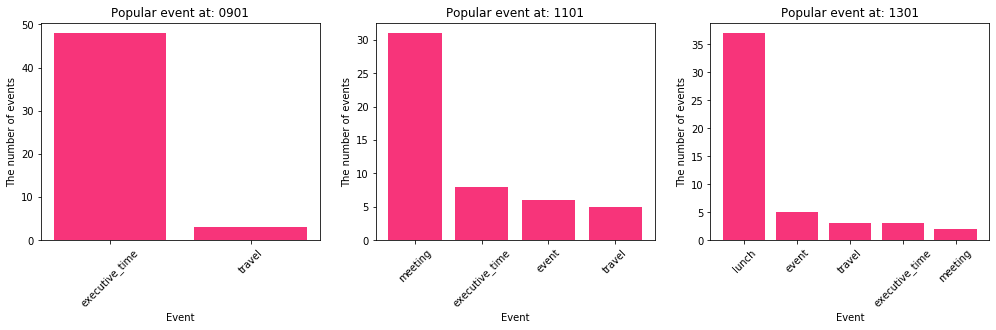

In [28]:
plt.figure(figsize=(17,4))
plt.subplot(1, 3, 1)
plot_top_by_time(df,'top_category_0901')
plt.subplot(1, 3, 2)
plot_top_by_time(df,'top_category_1101')
plt.subplot(1, 3, 3)
plot_top_by_time(df,'top_category_1301')

In [32]:
categories_in_first_part = df.top_category[:300]
categories_in_last_part = df.top_category[300:]
if len(set(np.unique(categories_in_last_part)) - set(np.unique(categories_in_first_part)))!=0:
    print('WARNING: President Trump has new activities in the last month')
else:
    print('President Trump has no new activities in the last month')

President Trump has no new activities in the last month


#### hypothesis #1
The most popular event is executive_time. And just in this period Trump can watch the TV. In business problem is predict the top_category at 15:01, and we will buy an ad if that top_category is executive_time. But maybe Trump did his executive_time much more often in anothe time.  

In [33]:
df_executive = df[df.top_category == 'executive_time']

In [34]:
print((df_executive.top_category_1501.sum()/df_executive.shape[0])*100,' %')

9.871244635193133  %


In [35]:
df_executive = df_executive.sort_values('time_start')

In [36]:
df_executive = df_executive.reset_index()

In [37]:
def cut_interval(df):
    delta = 5
    start = df.time_start 
    end = df.time_end
    right_interval_value = (datetime.datetime.combine(datetime.date(1, 1, 1), start) + datetime.timedelta(minutes=delta)).time()
    df_interval = [start]
    while right_interval_value<end:
        df_interval.append(right_interval_value)
        start = right_interval_value
        right_interval_value = (datetime.datetime.combine(datetime.date(1, 1, 1), start) + datetime.timedelta(minutes=delta)).time()
    df_interval.append(end)
    return df_interval

In [38]:
intervals = df_executive.apply(lambda x:cut_interval(x),axis = 1)

In [39]:
df_interval = pd.DataFrame()
for row in intervals:
    df_interval_part = pd.DataFrame([str(row[i])+'-' + str(row[i+1]) for i in range(len(row)-1)],columns = ['interval'])
    df_interval = pd.concat([df_interval,df_interval_part]).reset_index(drop = True)

In [40]:
df_interval.interval.value_counts().head(20)

08:30:00-08:35:00    50
08:25:00-08:30:00    50
08:45:00-08:50:00    50
08:35:00-08:40:00    50
08:15:00-08:20:00    50
08:10:00-08:15:00    50
08:50:00-08:55:00    50
08:00:00-08:05:00    50
08:20:00-08:25:00    50
08:55:00-09:00:00    50
08:05:00-08:10:00    50
08:40:00-08:45:00    50
09:05:00-09:10:00    48
09:10:00-09:15:00    48
09:00:00-09:05:00    48
09:15:00-09:20:00    47
09:25:00-09:30:00    47
09:20:00-09:25:00    47
09:35:00-09:40:00    46
09:40:00-09:45:00    46
Name: interval, dtype: int64

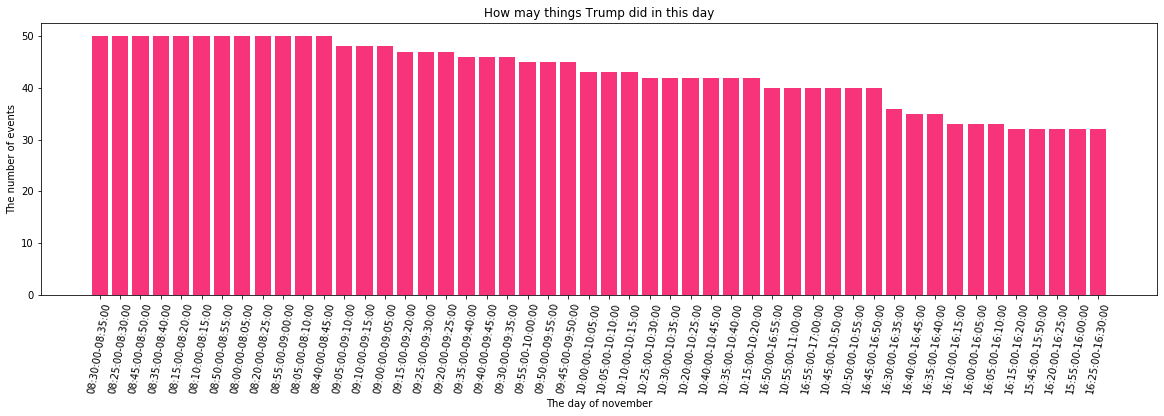

In [41]:
df_interval_bar =  df_interval.interval.value_counts().head(50)
plt.figure(figsize = (20,5))
height  = df_interval_bar
bars = df_interval_bar.index
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = '#F7347A')
plt.xticks(y_pos, bars)
plt.title('How may things Trump did in this day')
plt.ylabel('The number of events')
plt.xlabel('The day of november')
plt.xticks(rotation =  80)
plt.show()

In [33]:
def training_data(df):
    data_train = pd.DataFrame()
    data_train['top_category_0901'] = df[df.top_category_0901 ==1].top_category.reset_index(drop = True)
    data_train['top_category_1101'] = df[df.top_category_1101 ==1].top_category.reset_index(drop = True)
    data_train['top_category_1301'] = df[df.top_category_1301 ==1].top_category.reset_index(drop = True)
    data_train['top_category_1501'] = df[df.top_category_1501 ==1].top_category.reset_index(drop = True)
    return data_train

In [34]:
train_df = df.groupby('date').apply(training_data)

In [35]:
train_df = train_df.dropna(subset=['top_category_1501'])

In [36]:
train_df.to_csv('train_df.csv',index=False)

In [37]:
train_df.isna().sum()

top_category_0901    0
top_category_1101    1
top_category_1301    1
top_category_1501    0
dtype: int64